In [1]:
import lime
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
import scipy
import json
import pickle

import tuner_library
import utilities as util
import matplotlib.pyplot as plt

In [2]:
#ask user to input the name of classes and store it in classNames as a json
class_names = ['atheism', 'christian']
class_names = json.dumps(class_names)

#converting json to array object which will be used by the code further
class_names = json.loads(class_names)
print(class_names)

#get the text from the user in the string form(not json)
text = 'From: crackle!dabbott@munnari.oz.au (NAME)\nSubject: "Why I am not Bertrand Russell" (2nd request)\nReply-To: dabbott@augean.eleceng.adelaide.edu.au (Derek Abbott)\nOrganization: Electrical & Electronic Eng., University of Adelaide\nLines: 4\n\nCould the guy who wrote the article "Why I am not Bertrand Russell"\nresend me a copy?\n\nSorry, I accidently deleted my copy and forgot your name.\n'

['atheism', 'christian']


In [3]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
class_names = ['atheism', 'christian']

In [4]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

In [8]:
from sklearn.naive_bayes import MultinomialNB
rf = MultinomialNB()
rf.fit(train_vectors, newsgroups_train.target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [9]:
pred = rf.predict(test_vectors)
sklearn.metrics.f1_score(newsgroups_test.target, pred, average='binary')

0.8846584546472563

In [10]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, rf)

In [12]:
import pickle
pickle.dump(c, open("model.pkl", 'wb'))

In [13]:
from tuner_library import tuner
tl = tuner(text,'model.pkl', class_names)
result = util.JsonToArray(tl.get_Prediction()) 
result

HII


array([[0.52716367, 0.47283633]])

In [14]:
#ask user to input the value of sigma and store it in sigma as a json
sigma = 25
sigma = json.dumps(sigma)

#converting json to array object which will be used by the code further
sigma = json.loads(sigma)
sigma

25

In [15]:
#get the explanation for a particular sigma (all the explanation fields are filled)
exp = tl.get_Explanation(sigma)
print(exp.rf_score)
exp.save_to_file('explanation_25.html')

sigma = 25
0.0004431511886529903


In [16]:
k = 0.39062499968
tl.sigmas = k*2**np.arange(13)

In [17]:
for sigma in tl.sigmas:
    exp = tl.get_Explanation(sigma)    

sigma = 0.39062499968
sigma = 0.78124999936
sigma = 1.56249999872
sigma = 3.12499999744
sigma = 6.24999999488
sigma = 12.49999998976
sigma = 24.99999997952
sigma = 49.99999995904
sigma = 99.99999991808
sigma = 199.99999983616
sigma = 399.99999967232
sigma = 799.99999934464
sigma = 1599.99999868928


In [18]:
#for plotting entropy v/s sigma curve
sigmas, entropies = tl.get_Sigma_Entropy()
#get the rmse values(all the explanation models) for all the sigmas 
sigmas,constant_rmse, linear_rmse, decisionTree_rmse, randomForest_rmse = tl.get_RMSEs_And_Sigmas()

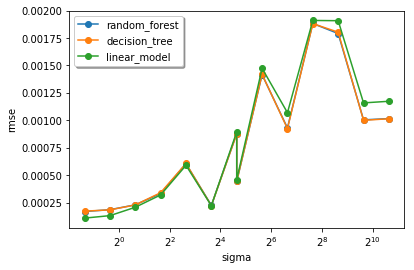

In [19]:
#plot the sigma v/s rmses 
axes=plt.gca()

plt.xscale('log', basex = 2)
plt.xlabel("sigma")
plt.ylabel("rmse");

plt.plot(sigmas, randomForest_rmse,'-o',label = 'random_forest')
plt.plot(sigmas, decisionTree_rmse,'-o',label = 'decision_tree')
plt.plot(sigmas, linear_rmse,'-o', label = 'linear_model')
# plt.plot(width, constant_rmse,'-o',label = 'constant_model')
# plt.suptitle('Example id = ' + str(idx))

legend = plt.legend(loc='upper left', shadow=True)

legend.get_frame()

#plot the sigma v/s rmses 
# axes=plt.gca()

# plt.xscale('log', basex = 2)
# plt.xlabel("sigma")
# plt.ylabel("rmse");

# plt.plot(sigmas[0:4], randomForest_rmse[0:4],'-o',label = 'random_forest')
# plt.plot(sigmas[0:4], decisionTree_rmse[0:4],'-o',label = 'decision_tree')
# plt.plot(sigmas[0:4], linear_rmse[0:4],'-o', label = 'linear_model')
# plt.plot(sigmas[0:4], constant_rmse[0:4],'-o',label = 'constant_model')
# # plt.suptitle('Example id = ' + str(idx))

# legend = plt.legend(loc='upper left', shadow=True)

# legend.get_frame()

1599.99999868928


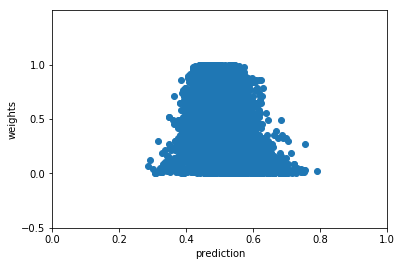

In [20]:
#for plotting weight distribution of neighbourhood points for a particular sigma
weights, predictions = tl.get_Weight_Distribution_Plot_Per_Sigma(25)

#plot the weight distribution of neighbour points for a particular sigma
axes=plt.gca()
plt.ylabel("weights")
plt.xlabel("prediction");
plt.ylim(-0.5, 1.5)
major_ticks = np.arange(-0.5, 1.5, 0.5)
axes.set_yticks(major_ticks) 
plt.xlim(0,1)
print(sigma)
plt.plot(predictions, weights,'o')

In [21]:

print(tl.getRange_Constant_Model())
print(tl.getRange_Linear_Model())

[0.39, 0.78124999936]
[0.78124999936, 12.49999998976]


In [22]:
print(linear_rmse)
print(constant_rmse)

[0.00010826101077790044, 0.00013078395346497514, 0.00020711388361315753, 0.000319685966618765, 0.0005893416648558338, 0.00022149507557837434, 0.0008944249220526602, 0.00045931466789415274, 0.0014741461414047687, 0.0010692541936329, 0.001910086759586818, 0.0019076476770898024, 0.001158486776985535, 0.001173278113201037]
[0.00010466211092757333, 0.00013969973161453124, 0.0002283294829435829, 0.000356279065521598, 0.000647301378599877, 0.0012720531200103096, 0.0021445548149577965, 0.002156606859374894, 0.0032378963119414714, 0.003787584822652496, 0.003899908334061237, 0.0040325831693072915, 0.003919972560966604, 0.00399061645663601]
